# Collect Data #

In [191]:
%matplotlib inline

import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from subprocess import check_output
from IPython.display import display, HTML

datasetFolder = "datasets/nba-players-stats-since-1950"
print(check_output(["ls", datasetFolder]).decode("utf8"))

Players.csv
Seasons_Stats.csv



In [192]:
players=pd.read_csv(datasetFolder + '/Players.csv')
seasons=pd.read_csv(datasetFolder + '/Seasons_Stats.csv')

In [193]:
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [194]:
seasons.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [195]:
players.shape #shape of the players dataframe

(3922, 8)

In [196]:
seasons.shape #shape of the seasons dataframe

(24691, 53)

# Prepare the Input Data #

In [197]:
seasons.isnull().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [198]:
seasonColumns = ['Year','Player','Pos','Age','Tm','G','2P%','3P%','FG%','FT%','DRB','ORB','TRB','AST','STL','BLK','TOV']
seasons.drop('Unnamed: 0', axis=1,inplace=True)
seasons.dropna(how='all',inplace=True) #dropping the players whose value is null
seasons.shape

(24624, 52)

In [199]:
seasons.head(10)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
5,1950.0,Ed Bartels,F,24.0,NYK,2.0,NaN,NaN,NaN,0.376,...,0.667,NaN,NaN,NaN,0.0,NaN,NaN,NaN,2.0,4.0
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,NaN,0.422,...,0.762,NaN,NaN,NaN,233.0,NaN,NaN,NaN,132.0,895.0
7,1950.0,Gene Berce,G-F,23.0,TRI,3.0,NaN,NaN,NaN,0.275,...,0.000,NaN,NaN,NaN,2.0,NaN,NaN,NaN,6.0,10.0
8,1950.0,Charlie Black,F-C,28.0,TOT,65.0,NaN,NaN,NaN,0.346,...,0.651,NaN,NaN,NaN,163.0,NaN,NaN,NaN,273.0,661.0
9,1950.0,Charlie Black,F-C,28.0,FTW,36.0,NaN,NaN,NaN,0.362,...,0.632,NaN,NaN,NaN,75.0,NaN,NaN,NaN,140.0,382.0


In [200]:
seasons2010plus = seasons[seasons.Year >= 2010]
seasons2010plus = pd.DataFrame(seasons2010plus,columns=seasonColumns)
seasons2010plus['FT%'].fillna(0, inplace=True)
seasons2010plus['2P%'].fillna(0, inplace=True)
seasons2010plus['3P%'].fillna(0, inplace=True)
seasons2010plus['FG%'].fillna(0, inplace=True)
seasons2010plus['80upFT%'] = (seasons2010plus['FT%']*100 / 80).astype(int)
seasons2010plus.head(10)

,Year,Player,Pos,Age,Tm,G,2P%,3P%,FG%,FT%,DRB,ORB,TRB,AST,STL,BLK,TOV,80upFT%
19922,2010.0,Arron Afflalo,SG,24.0,DEN,82.0,0.488,0.434,0.465,0.735,193.0,59.0,252.0,138.0,46.0,30.0,74.0,0
19923,2010.0,Alexis Ajinca,C,21.0,CHA,6.0,0.500,0.000,0.500,0.000,3.0,1.0,4.0,0.0,1.0,1.0,2.0,0
19924,2010.0,LaMarcus Aldridge,PF,24.0,POR,78.0,0.498,0.313,0.495,0.757,435.0,192.0,627.0,160.0,67.0,48.0,104.0,0
19925,2010.0,Joe Alexander,SF,23.0,CHI,8.0,0.200,0.000,0.167,0.667,3.0,2.0,5.0,2.0,1.0,1.0,0.0,0
19926,2010.0,Malik Allen,PF,31.0,DEN,51.0,0.409,0.167,0.397,0.923,46.0,36.0,82.0,16.0,11.0,5.0,22.0,1
19927,2010.0,Ray Allen,SG,34.0,BOS,80.0,0.556,0.363,0.477,0.913,208.0,45.0,253.0,210.0,64.0,25.0,129.0,1
19928,2010.0,Tony Allen,SG,28.0,BOS,54.0,0.520,0.000,0.510,0.605,93.0,52.0,145.0,72.0,59.0,19.0,66.0,0
19929,2010.0,Rafer Alston,PG,33.0,TOT,52.0,0.349,0.345,0.348,0.728,116.0,13.0,129.0,176.0,50.0,10.0,95.0,0
19930,2010.0,Rafer Alston,PG,33.0,NJN,27.0,0.353,0.322,0.343,0.815,66.0,9.0,75.0,104.0,27.0,5.0,61.0,1
19931,2010.0,Rafer Alston,PG,33.0,MIA,25.0,0.341,0.370,0.355,0.556,50.0,4.0,54.0,72.0,23.0,5.0,34.0,0


In [201]:
trainSet = pd.DataFrame(seasons2010plus,columns=['80upFT%','2P%','3P%','FG%'])
trainSet.head(10)

,80upFT%,2P%,3P%,FG%
19922,0,0.488,0.434,0.465
19923,0,0.500,0.000,0.500
19924,0,0.498,0.313,0.495
19925,0,0.200,0.000,0.167
19926,1,0.409,0.167,0.397
19927,1,0.556,0.363,0.477
19928,0,0.520,0.000,0.510
19929,0,0.349,0.345,0.348
19930,1,0.353,0.322,0.343
19931,0,0.341,0.370,0.355


In [202]:
X = trainSet.iloc[:,1:4]
Y = trainSet.iloc[:,0]
X.head()

,2P%,3P%,FG%
19922,0.488,0.434,0.465
19923,0.500,0.000,0.500
19924,0.498,0.313,0.495
19925,0.200,0.000,0.167
19926,0.409,0.167,0.397


# Analyze the Input Data #

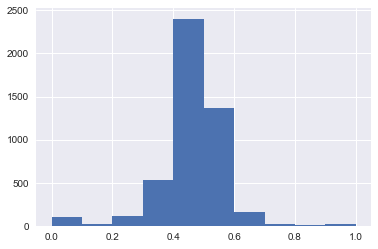

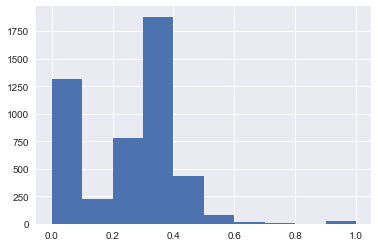

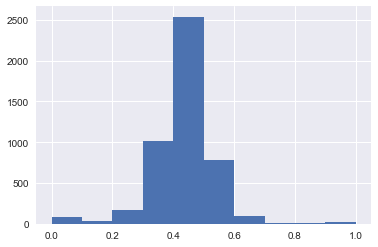

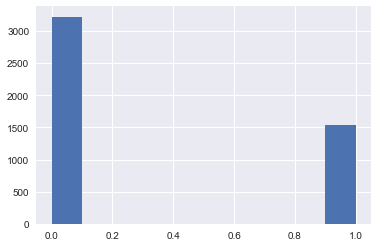

In [203]:
plt.hist(X.iloc[:,0])
plt.show()
plt.hist(X.iloc[:,1])
plt.show()
plt.hist(X.iloc[:,2])
plt.show()
plt.hist(Y)
plt.show()

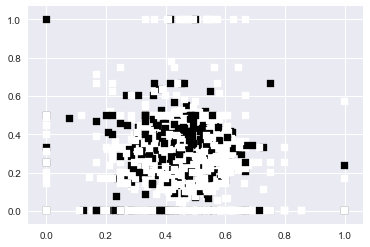

In [204]:
plt.scatter(X.iloc[:,0],X.iloc[:,1],c=Y, marker ='s')
plt.show()

In [205]:
# Shuffle the dataset
trainSet2 = trainSet.loc[np.random.permutation(trainSet.index)]

In [206]:
num_train = 3000
data_train = trainSet[:num_train]
data_test = trainSet[num_train:]

In [207]:
column = ['2P%','3P%','FG%']
model = LogisticRegression()
model.fit(data_train[column],data_train['80upFT%'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

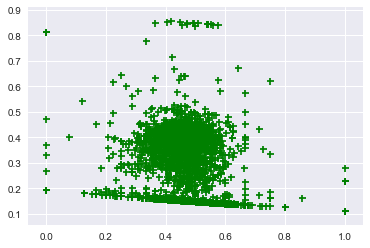

In [209]:
train = model.predict_proba(data_train[column])[:,1]
plt.scatter(data_train['2P%'], train, marker = '+', color = 'g')
plt.xlabel = '2P%'
plt.ylabel = 'Prob'
plt.show()

In [210]:
pred_train = model.predict(data_train[column])

In [211]:
accuracy_train = (pred_train == data_train['80upFT%']).mean()
accuracy_train

0.67700000000000005

In [212]:
pred_test = model.predict(data_test[column])

In [213]:
accuracy_test = (pred_test == data_test['80upFT%']).mean()
accuracy_test

0.64585698070374575

Auc_train: 0.6968816670955745
Auc_test: 0.6905089457501457


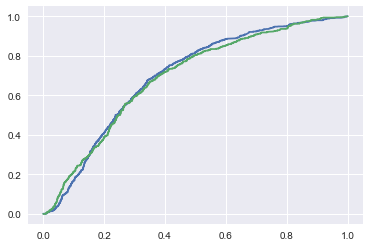

In [215]:
from sklearn.metrics import roc_curve, roc_auc_score

train_probs = model.predict_proba(data_train[column])[:,1]
test_probs = model.predict_proba(data_test[column])[:,1]

auc_train = roc_auc_score(data_train["80upFT%"], train_probs)
auc_test = roc_auc_score(data_test["80upFT%"], test_probs)

print('Auc_train: {}'.format(auc_train))
print('Auc_test: {}'.format(auc_test))

roc_train = roc_curve(data_train["80upFT%"], train_probs)
roc_test = roc_curve(data_test["80upFT%"], test_probs)

plt.plot(roc_train[0], roc_train[1])

plt.plot(roc_test[0], roc_test[1])
plt.show()
